## This notebook will show the effect of Convolution layer on image by applying different filters and then further pooling layer to compress the size and increase the feature

In [37]:
import cv2     # import opencv 
import numpy as np
from scipy import misc    
image = misc.ascent()    # Load a predefined 2D grayscale image from the scipy.misc package

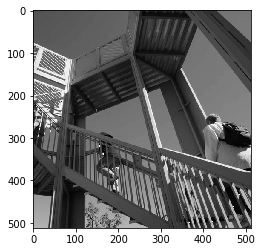

In [44]:
import matplotlib.pyplot as plt
# Display image as grayscale
plt.grid(False)
plt.gray()
# plt.axis('off')
plt.imshow(image)
plt.show()

**Copy image and check its size**

In [39]:
image_transformed = np.copy(image)
size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]
print(size_x, size_y)

512 512


**Create a filter as a 3x3 array**

In [33]:
# Try with different filters by uncommenting 1 at a time
# filter to pass certain information
# filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# Vertical filter to detect vertical edges
# filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]

# Horizontal filter to detect horizontal edges
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# filter to increase the sharpness
# filter = [ [-1, -1, -1], [-1,  9, -1], [-1, -1, -1] ]

# If all the digits in the filter don't add up to 0 or 1, you should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

**Create a convolution and iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter**

i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. etc. We'll then multiply the result by the weight, and then ensure the result is in the range 0-255

Finally load the new value into the transformed image. 

In [42]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (image[x - 1, y-1] * filter[0][0])
      convolution = convolution + (image[x, y-1] * filter[0][1])
      convolution = convolution + (image[x + 1, y-1] * filter[0][2])
      convolution = convolution + (image[x-1, y] * filter[1][0])
      convolution = convolution + (image[x, y] * filter[1][1])
      convolution = convolution + (image[x+1, y] * filter[1][2])
      convolution = convolution + (image[x-1, y+1] * filter[2][0])
      convolution = convolution + (image[x, y+1] * filter[2][1])
      convolution = convolution + (image[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      image_transformed[x, y] = convolution

**Plot the image to see the effect of the convolution**

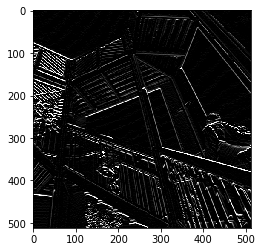

In [43]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(image_transformed)
#plt.axis('off')
plt.show()   

## Applying Pooling on Image
**Apply a (2, 2) pooling. The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. Take the largest of them and load it into the new image. Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!**

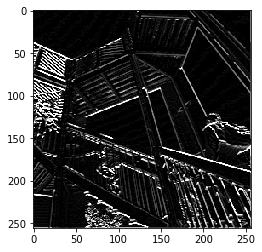

In [45]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(image_transformed[x, y])
    pixels.append(image_transformed[x+1, y])
    pixels.append(image_transformed[x, y+1])
    pixels.append(image_transformed[x+1, y+1])
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()  